<a href="https://colab.research.google.com/github/sajeebju/Seismic-Lab/blob/main/Exercise_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - 8

Calculate the interval velocities and layer
thicknesses interpreting the attached
seismogram recorded in an area of coastal
plain sediments Geophones were placed in a
line at 35 meter intervals, and the source was
located 70 me ters from the first geophone
The t 0 times were determined assuming
horizontal reflectors

From the velocities found above, what rock
types you would expect to encounter in a drill
hole?

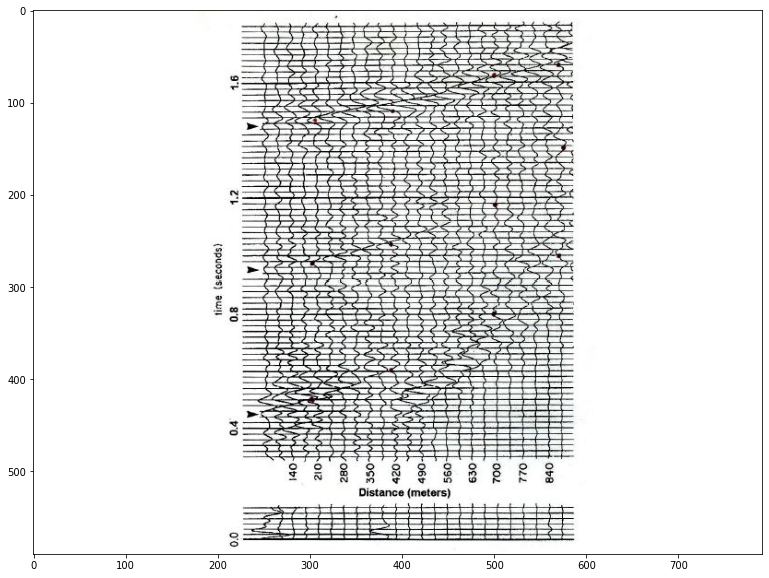

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/content/drive/MyDrive/Python/traces.JPG")
plt.figure(figsize = (20, 10))
plt.imshow(img)

# Data Frame Create

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

X_m = np.array([210, 420, 700, 875])
X_km = (X_m/ 1000)
X_sqr_km = X_km**2
t1_s = np.array([0.5, 0.6, 0.8, 1])
t1_s_sqr = (t1_s)**2

t2_s = np.array([0.975, 1.04, 1.175, 1.375])
t2_s_sqr = (t2_s)**2

t3_s = np.array([1.47, 1.53, 1.62, 1.66])
t3_s_sqr = (t3_s)**2

df = pd.DataFrame({"X_m" : X_m, "X_sqr_m" : X_sqr_km,
                   "t1_s" : t1_s, "t1_s_sqr" : t1_s_sqr, "t2_s" : t2_s, "t2_s_sqr" : t2_s_sqr,
                   "t3_s" : t3_s, "t3_s_sqr" : t3_s_sqr})
df

,X_m,X_sqr_m,t1_s,t1_s_sqr,t2_s,t2_s_sqr,t3_s,t3_s_sqr
0,210,0.044100,0.5,0.25,0.975,0.950625,1.47,2.1609
1,420,0.176400,0.6,0.36,1.040,1.081600,1.53,2.3409
2,700,0.490000,0.8,0.64,1.175,1.380625,1.62,2.6244
3,875,0.765625,1.0,1.00,1.375,1.890625,1.66,2.7556


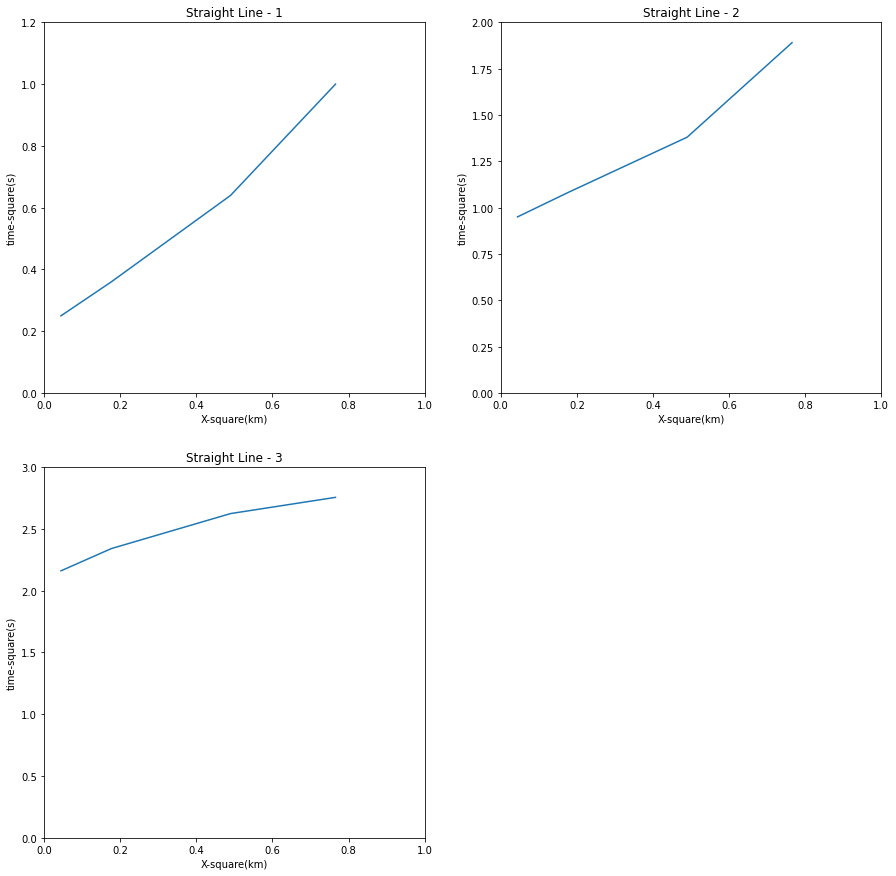

In [ ]:
plt.figure(figsize = (15, 15))
ax1 = plt.subplot(221)
ax1.plot(df["X_sqr_m"], df["t1_s_sqr"])
ax1.set_xlabel("X-square(km)")
ax1.set_ylabel("time-square(s)")
ax1.set_xlim(0, 1.0)
ax1.set_ylim(0, 1.2)
ax1.set_title("Straight Line - 1")

ax2 = plt.subplot(222)
ax2.plot(df["X_sqr_m"], df["t2_s_sqr"])
ax2.set_xlabel("X-square(km)")
ax2.set_ylabel("time-square(s)")
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0, 2.0)
ax2.set_title("Straight Line - 2")

ax3 = plt.subplot(223)
ax3.plot(df["X_sqr_m"], df["t3_s_sqr"])
ax3.set_xlabel("X-square(km)")
ax3.set_ylabel("time-square(s)")
ax3.set_xlim(0, 1.0)
ax3.set_ylim(0, 3)
ax3.set_title("Straight Line - 3")
plt.show()

In [ ]:
t0_1 = 0.45
t0_2 = 0.95
t0_3 = 1.49

# determination of slopes for 3 different straight lines

#for straight line 1
#  slope = 1/v**2  = del(t**2) / del(x**2)

t1_sqr = df.iloc[2]["t1_s_sqr"]
t2_sqr = df.iloc[3]["t1_s_sqr"]

x1_sqr = df.iloc[2]["X_sqr_m"]
x2_sqr = df.iloc[3]["X_sqr_m"]

slope1 = round((t2_sqr - t1_sqr) / (x2_sqr - x1_sqr), 3)

# velocity v1 = sqrt(1/slope1)

v1 = round(np.sqrt(1/slope1), 3)
v1

0.875

In [ ]:
#for straight line 2
#  slope = 1/v**2  = del(t**2) / del(x**2)

t1_sqr_2 = df.iloc[2]["t2_s_sqr"]
t2_sqr_2 = df.iloc[3]["t2_s_sqr"]

x1_sqr = df.iloc[2]["X_sqr_m"]
x2_sqr = df.iloc[3]["X_sqr_m"]

slope2 = round((t2_sqr_2 - t1_sqr_2) / (x2_sqr - x1_sqr), 3)

# velocity v2 = sqrt(1/slope2)

v2 = round(np.sqrt(1/slope2), 3)
v2

0.735

In [ ]:
#for straight line 3
#  slope = 1/v**2  = del(t**2) / del(x**2)

t1_sqr_3 = df.iloc[2]["t3_s_sqr"]
t2_sqr_3 = df.iloc[3]["t3_s_sqr"]

x1_sqr = df.iloc[2]["X_sqr_m"]
x2_sqr = df.iloc[3]["X_sqr_m"]

slope3 = round((t2_sqr_3 - t1_sqr_3) / (x2_sqr - x1_sqr), 3)

# velocity v3 = sqrt(1/slope3)

v3 = round(np.sqrt(1/slope3), 3)
v3

1.449

Determination of Interval Velocity using Dix Equation


In [ ]:
#Dix equation
# Vn^2 = (Vn^2 rms * t0_n  - Vn-1^2 rms * t0_n-1 ) / (t0_n - t0_n-1)

t0_1 = 0.45
t0_2 = 0.95
t0_3 = 1.49

v2_rms = v2
v1_rms = v1

#Interval velocity for layer 2

V2 = round(np.sqrt((((v2**2) * t0_2) - ((v1**2) * t0_1) ) / (t0_2 - t0_1)), 3)
V2

0.581

In [ ]:
#Interval velocity for layer 3

V3 = round(np.sqrt((((v3**2) * t0_3) - ((v3**2) * t0_2) ) / (t0_3 - t0_2)), 3)
V3

1.449

In [ ]:
# Depth determination
# depth h = 0.5 * Vn (t0_n - t0_n-1)

h1 = round(0.5 * v1 * (t0_1 - 0), 3)
h2 = round(0.5 * V2 * (t0_2 - t0_1), 3)
h3 = round(0.5 * V3 * (t0_3 - t0_2), 3)

print("h1 = " + str(h1) + " km")
print("h2 = " + str(h2) + " km")
print("h3 = " + str(h3) + " km")

h1 = 0.197 km
h2 = 0.145 km
h3 = 0.391 km
